# Lab3 Credit Risk Classification

## 0.导入所需的库

本实验主要使用的库及其在实验中的功能：
- pandas: 数据处理
- numpy: 数据处理
- sklearn: 机器学习
- pytorch: 深度学习

In [79]:
# 导入所需的库
import pandas as pd # 数据处理
import matplotlib.pyplot as plt # 数据可视化
import seaborn as sns # 数据可视化
import os # 处理文件路径

from matplotlib.pyplot import savefig
from sklearn.preprocessing import MinMaxScaler # 数据标准化
from sklearn.preprocessing import LabelEncoder # 类别型变量编码
from sklearn.model_selection import train_test_split, GridSearchCV # 模型训练和验证
from sklearn.tree import DecisionTreeClassifier # 决策树模型
from sklearn.tree import export_graphviz # 决策树可视化
import graphviz # 决策树可视化
from sklearn.naive_bayes import GaussianNB # 贝叶斯模型
from sklearn.svm import SVC # SVM模型
from sklearn.neural_network import MLPClassifier # 神经网络模型
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # 模型评估

## 1.数据读取和预处理

### 1.1 读取数据

In [2]:
# 读取数据
data = pd.read_csv('Credit_Risk.csv')

### 1.2 数据清洗
主要包括：
- 了解数据的基本信息
- 检查变量类型
- 检查数据是否存在缺失值、异常值、重复值
- 处理数据中的缺失值、异常值、重复值

In [3]:
# 查看数据
data.head()

,Applicant_ID,Credit_Score,Late_Payments,Months_In_Job,Debt_Income_Ratio,Loan_Amt,Liquid_Assets,Num_Credit_Lines,Credit_Risk
0,744488,607,5,29,3.414,103519,2696,6,Moderate
1,350833,533,8,21,3.737,74868,5336,8,Moderate
2,466037,474,12,25,5.061,93468,1785,4,High
3,721737,551,13,3,5.926,41708,2104,10,High
4,455703,768,0,13,1.910,318995,11523,3,Low


In [4]:
# 查看数据信息（变量类型、缺失值、样本数等）
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Applicant_ID       676 non-null    int64  
 1   Credit_Score       676 non-null    int64  
 2   Late_Payments      676 non-null    int64  
 3   Months_In_Job      676 non-null    int64  
 4   Debt_Income_Ratio  676 non-null    float64
 5   Loan_Amt           676 non-null    int64  
 6   Liquid_Assets      676 non-null    int64  
 7   Num_Credit_Lines   676 non-null    int64  
 8   Credit_Risk        676 non-null    object 
dtypes: float64(1), int64(7), object(1)
memory usage: 47.7+ KB


In [5]:
# 查看数值型变量的描述性统计信息（均值、标准差、最小值、最大值等）
data.describe()

,Applicant_ID,Credit_Score,Late_Payments,Months_In_Job,Debt_Income_Ratio,Loan_Amt,Liquid_Assets,Num_Credit_Lines
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,548953.392012,613.591716,5.023669,27.445266,3.794420,189545.633136,7464.181953,5.186391
std,245697.572749,117.779891,4.564537,18.935249,2.514157,88783.745728,5670.381218,2.525284
min,139993.000000,397.000000,0.000000,2.000000,0.050000,39236.000000,830.000000,1.000000
25%,327483.500000,517.000000,1.000000,14.000000,1.917500,115715.250000,2980.000000,3.000000
50%,529909.000000,595.500000,4.000000,23.000000,3.025000,186210.500000,5227.500000,5.000000
75%,760908.500000,723.000000,8.000000,38.000000,4.850000,257236.250000,10871.000000,7.000000
max,980774.000000,826.000000,23.000000,102.000000,12.523000,449485.000000,24699.000000,12.000000


In [6]:
# 查看类别型变量的描述性统计信息（计数、唯一值、最常见值等）
data.describe(include= 'object')

,Credit_Risk
count,676
unique,5
top,Low
freq,221


In [7]:
# 查看类别型变量的唯一值
data['Credit_Risk'].unique()

array(['Moderate', 'High', 'Low', 'DO NOT LEND', 'Very Low'], dtype=object)

In [8]:
# 检查id是否存在重复值
data['Applicant_ID'].duplicated().sum()

0

根据观察到的数据信息，我们可以发现：
- 共有9个变量，其中有7个是数值型特征变量，1个是类别型变量，1个是id变量
- 无缺失值
- 无异常值
- 类别型变量`Credit_Risk`的唯一值有5个，分别为'Moderate', 'High', 'Low', 'DO NOT LEND', 'Very Low'
- 无重复行

### 1.3 EDA可视化分析

进行数据探索可视化分析，分析数据的分布、相关性等。

In [12]:
# 提取特征变量和目标变量
X = data.drop(['Applicant_ID','Credit_Risk'], axis=1)
y = data['Credit_Risk']

In [13]:
X.head()

,Credit_Score,Late_Payments,Months_In_Job,Debt_Income_Ratio,Loan_Amt,Liquid_Assets,Num_Credit_Lines
0,607,5,29,3.414,103519,2696,6
1,533,8,21,3.737,74868,5336,8
2,474,12,25,5.061,93468,1785,4
3,551,13,3,5.926,41708,2104,10
4,768,0,13,1.910,318995,11523,3


In [14]:
y.head()

0    Moderate
1    Moderate
2        High
3        High
4         Low
Name: Credit_Risk, dtype: object

In [15]:
# 设定plt样式
plt.style.use('ggplot')

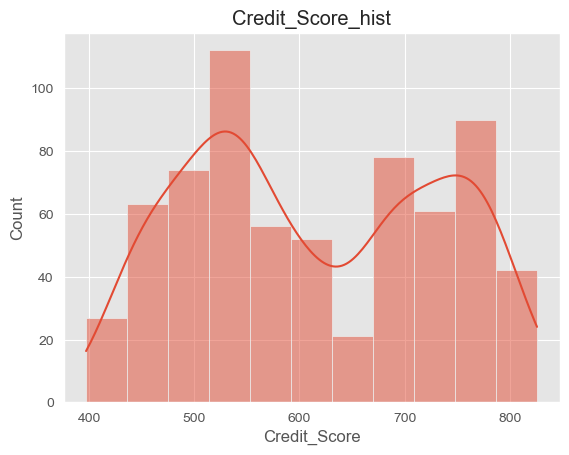

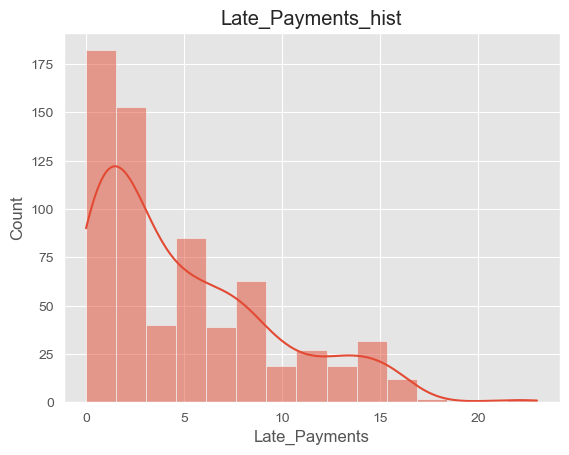

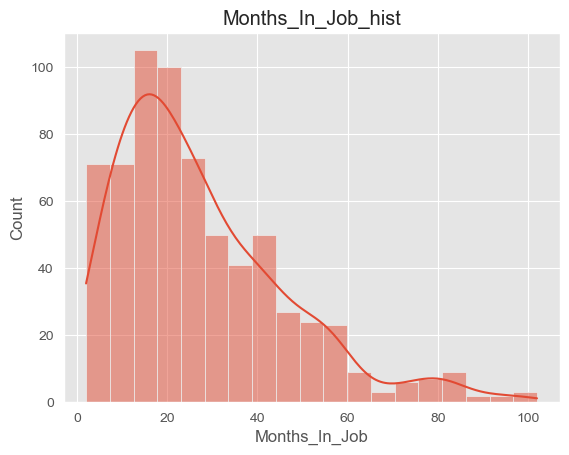

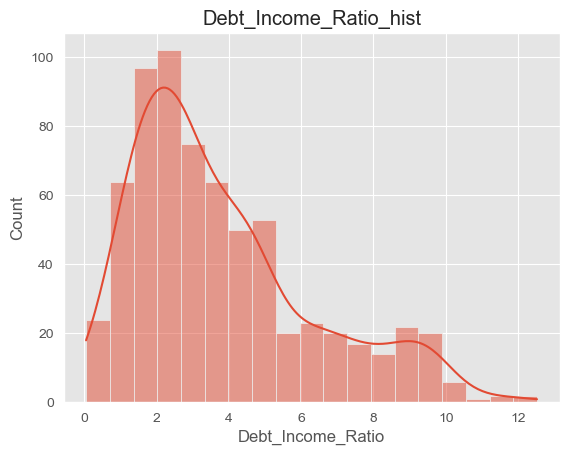

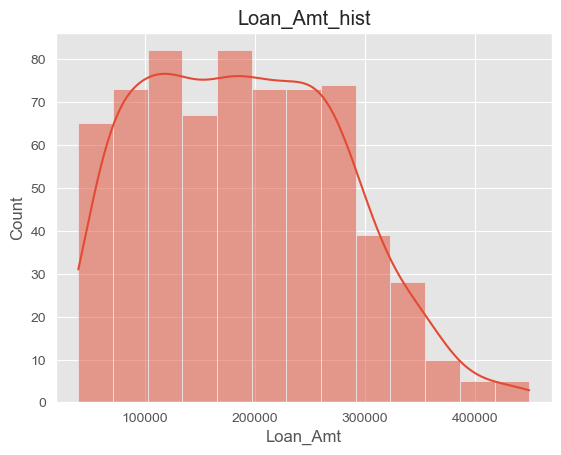

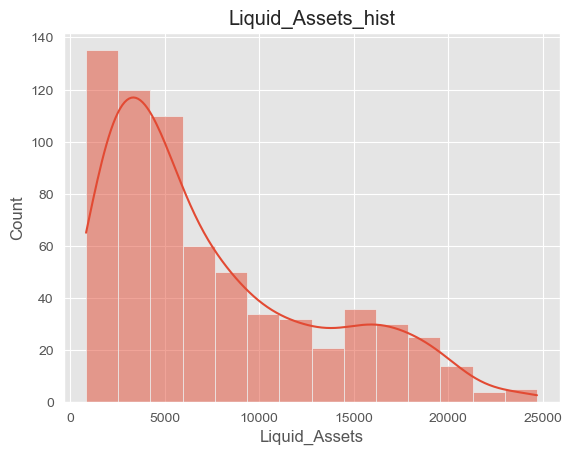

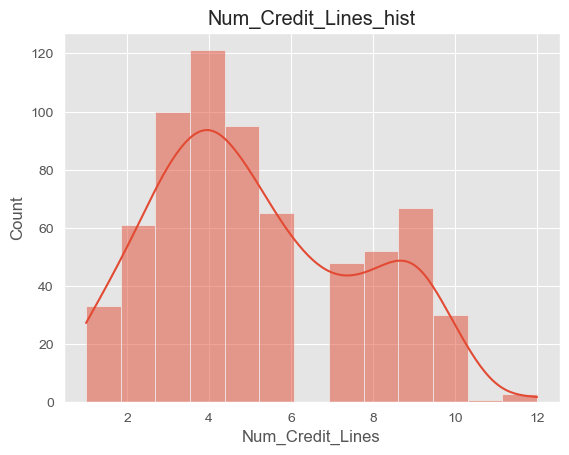

In [16]:
# 为特征变量绘制直方图，启用平滑的分布：
os.makedirs('EDA/Xhist', exist_ok=True)
for col in X.columns:
    sns.histplot(X[col],
                 kde=True)
    plt.title(f'{col}_hist')
    plt.savefig(f'EDA/Xhist/{col}.png')
    plt.show()

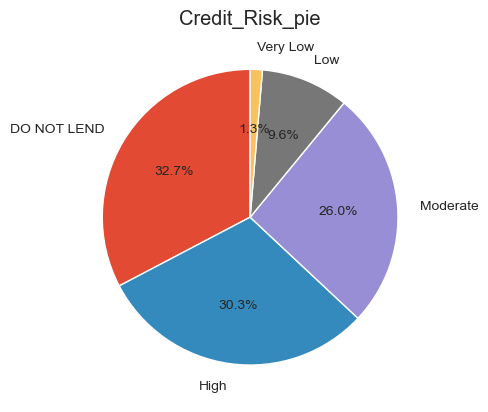

In [17]:
# 为目标变量绘制饼图
os.makedirs('EDA/ypie', exist_ok=True)
plt.pie(y.value_counts(),
        labels = ['DO NOT LEND', 'High','Moderate', 'Low', 'Very Low'],
        labeldistance = 1.15,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        autopct='%1.1f%%',
        startangle = 90)
plt.fontsize = 8
plt.title('Credit_Risk_pie')
plt.savefig('EDA/ypie/Credit_Risk_pie.png')
plt.show()

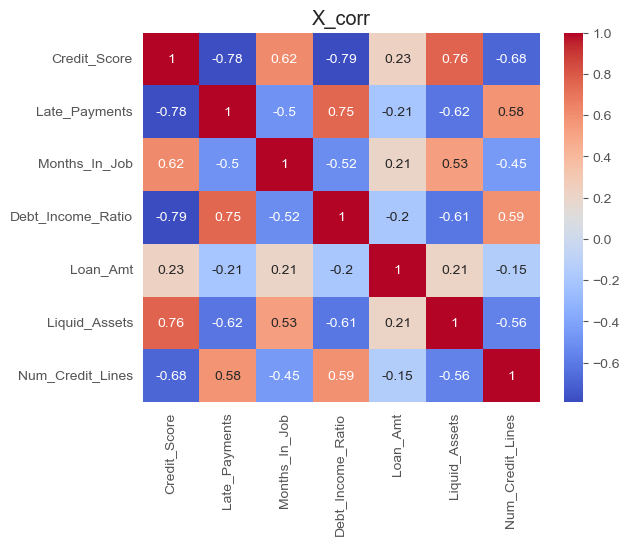

In [18]:
# 特征变量相关性分析
os.makedirs('EDA/Xcorr', exist_ok=True)
corr = X.corr()
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True)
plt.title('X_corr')
plt.savefig('EDA/Xcorr/X_corr.png')

由以上的可视化分析，我们可以得出以下结论：
- 特征变量的分布情况：
    - 大部分特征变量呈**正偏态分布**，`Credit_Score`分布不规律
    - **特征变量**间的相关性：
        - 大部分特征变量间不存在强相关性
        - 部分特征变量间存在较强的相关性，`Credit_Score`和大多特征变量间存在较强的相关性
    - **目标变量**的分布情况：
        - 目标变量的类别分布不均匀，`DO NOT LEND`类别的样本数占比最高，`Very Low`类别的样本数占比最低，按信用风险等级由高到低越来越少

### 1.4 特征工程

本实验的特征工程包括：
- 将目标类别变量进行编码
- 将特征变量进行标准化

In [29]:
# 对类别进行编码
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [28]:
# 特征变量标准化
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## 2. 划分数据集
考虑到样本量并不很多，在模型验证时考虑使用交叉验证的方法充分利用数据，不单独划分**验证集**，将数据集按$7：3$的比例划分为**训练集**和**测试集**。

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

## 3. 模型训练与选择

### 3.1 决策树

In [36]:
# 定义决策树模型和决策树的参数范围
tree = DecisionTreeClassifier(random_state=7)
param_grid_tree = {
    'criterion':['gini', 'entropy'], # 决策树的划分标准
    'max_depth':range(3,11), # 决策树的最大深度
    'min_samples_leaf':range(1,6), # 决策树的最小叶子节点样本数
    'min_samples_split':range(2,11), # 决策树分裂的最小样本数
}

In [55]:
# 使用网格搜索进行决策树模型最优参数的训练、验证和选择
grid_search_tree = GridSearchCV(tree, param_grid = param_grid_tree, cv = 5) # 5折交叉验证
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 11),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 11)})

In [56]:
# 得到最优参数
best_params_tree = grid_search_tree.best_params_
print(best_params_tree)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [41]:
# 使用最优参数训练决策树模型
tree_best = DecisionTreeClassifier(**best_params_tree, random_state=7)
tree_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=7)

In [103]:
# 导出决策树为graphviz格式
dot_data = export_graphviz(tree_best, out_file=None,
                           feature_names=['Credit_Score','Late_Payments','Months_In_Job','Debt_Income_Ratio','Loan_Amt','Liquid_Assets','Num_Credit_Lines'],
                           class_names=['DO NOT LEND', 'High', 'Moderate', 'Low', 'Very Low'],
                           filled=True, rounded=True,
                           special_characters=True)
# 使用graphviz库可视化决策树
graph = graphviz.Source(dot_data, format='png')
graph.render(filename='tree', directory = 'model/tree')

'model\\tree\\tree.png'

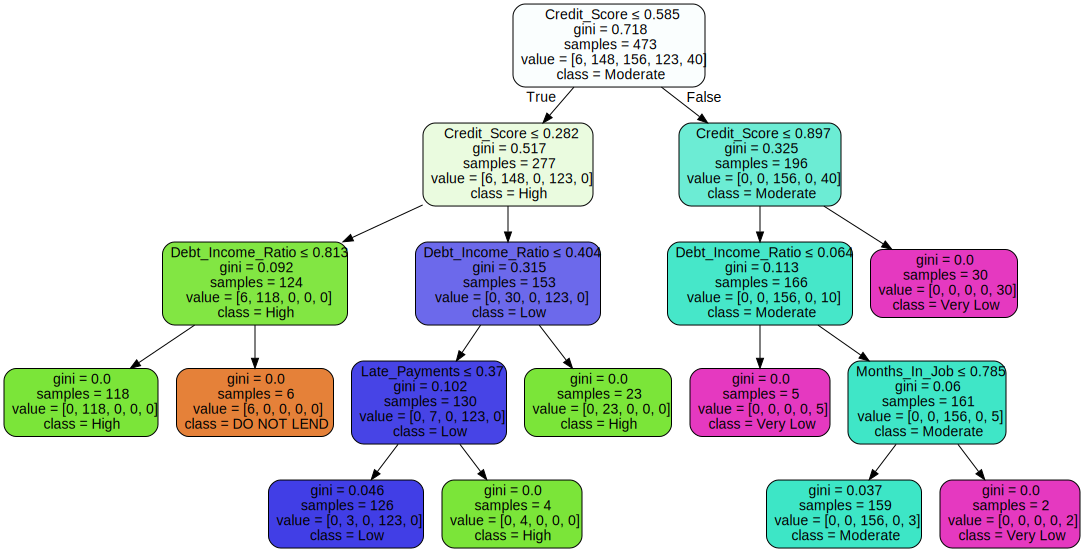

In [91]:
# 显示模型
graph

由上的决策树可视化结果，我们可以得出以下结论：
1. `Credit_Score` 是**第一个**划分的特征变量，也是**最重要**的特征变量，除了信息增益大，还能看出`Credit_Score`对样本的类别划分影响大，大体决定了最终`Credit_Risk`的高低
2. `Debt_Income_Ratio` 是**第二个**划分的特征变量
- 对于`Credit_Score`高者，其`Debt_Income_Ratio`如果较高，则还需按照`Months_In_Job`是否较短来判断是否有中等或极小风险
- 对于`Credit_Score`低者，其`Debt_Income_Ratio`如果较低，则需按照`Late_Payments`是否较多来判断是否是高或低风险

### 3.2 贝叶斯模型

In [59]:
# 定义高斯朴素贝叶斯模型和贝叶斯的参数范围
bayes = GaussianNB()
param_grid_bayes = {
    'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3] # 贝叶斯模型的平滑参数
    # 还可以设置指定先验概率分布的参数，由于本实验中特征变量的分布情况并无已知的不均衡问题，故不设置先验概率分布的参数
}

In [62]:
# 使用网格搜索进行贝叶斯模型最优参数的训练、验证和选择
grid_search_bayes = GridSearchCV(bayes, param_grid_bayes, cv = 5) # 5折交叉验证
grid_search_bayes.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001]})

In [76]:
# 得到最优参数
best_params_bayes = grid_search_bayes.best_params_
print(best_params_bayes)

{'var_smoothing': 1e-09}


In [67]:
# 使用最优参数训练贝叶斯模型
bayes_best = GaussianNB(**best_params_bayes) # 贝叶斯模型是概率模型，不需指定随机种子
bayes_best.fit(X_train, y_train)

GaussianNB()

### 3.3 SVM 支持向量机

In [104]:
# 定义SVM模型和SVM的参数范围
svm = SVC()
param_grid_svm = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], # SVM的核函数
    'C': [0.1, 1, 10], # SVM的正则化参数
    'gamma': [0.1, 1, 10] # SVM的核函数参数
}

In [105]:
# 使用网格搜索进行SVM模型最优参数的训练、验证和选择
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv = 5) # 5折交叉验证
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [106]:
# 得到最优参数
best_params_svm = grid_search_svm.best_params_
print(best_params_svm)

{'C': 10, 'gamma': 1, 'kernel': 'poly'}


In [108]:
# 使用最优参数训练SVM模型
svm_best = SVC(**best_params_svm)
svm_best.fit(X_train, y_train)

SVC(C=10, gamma=1, kernel='poly')

## 4. 模型评估

分类模型中，常用的结果评价指标包括**准确率（Accuracy）**、**精确率（Precision）**、**召回率（Recall）** 和 **F1分数（F1 Score）**。

- 准确率（Accuracy）：
    准确率是最直观的评价指标，它计算模型正确预测的样本数占总样本数的比例。
- 精确率（Precision）：
    精确率衡量模型预测为正类的样本中，实际为正类的比例。
- 召回率（Recall）：
    召回率衡量实际为正类的样本中，被模型正确预测为正类的比例。
- F1分数（F1 Score）：
    F1分数是精确率和召回率的调和平均值，综合考虑模型的精确性和召回率。
    > F1分数 = 2 * (精确率 * 召回率) / (精确率 + 召回率)

In [109]:
# 使用测试集进行预测
y_pred_tree = tree_best.predict(X_test)
y_pred_bayes = bayes_best.predict(X_test)
y_pred_svm = svm_best.predict(X_test)

In [110]:
# 计算准确率
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [111]:
# 计算精确率
precision_tree = precision_score(y_test, y_pred_tree, average='weighted') # 由于类别不平衡，使用加权平均
precision_bayes = precision_score(y_test, y_pred_bayes, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

In [112]:
# 计算召回率
recall_tree = recall_score(y_test, y_pred_tree, average='weighted') # 由于类别不平衡，使用加权平均
recall_bayes = recall_score(y_test, y_pred_bayes, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

In [113]:
# 计算F1值
f1_tree = f1_score(y_test, y_pred_tree, average='weighted') # 由于类别不平衡，使用加权平均
f1_bayes = f1_score(y_test, y_pred_bayes, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

In [114]:
# 打印评估结果
print(f'决策树模型评估结果：准确率{accuracy_tree:.4f}，精确率{precision_tree:.4f}，召回率{recall_tree:.4f}，F1值{f1_tree:.4f}')
print(f'贝叶斯模型评估结果：准确率{accuracy_bayes:.4f}，精确率{precision_bayes:.4f}，召回率{recall_bayes:.4f}，F1值{f1_bayes:.4f}')
print(f'SVM模型评估结果：准确率{accuracy_svm:.4f}，精确率{precision_svm:.4f}，召回率{recall_svm:.4f}，F1值{f1_svm:.4f}')

决策树模型评估结果：准确率0.9655，精确率0.9665，召回率0.9655，F1值0.9628
贝叶斯模型评估结果：准确率0.9606，精确率0.9608，召回率0.9606，F1值0.9599
SVM模型评估结果：准确率0.9557，精确率0.9582，召回率0.9557，F1值0.9562
